## Oppgavegjennomgang 1. mars 2022

Basert på datasettet gitt som python-oppgave 5. februar (filen "pressure1.dat" i katalogen Filer -> Python -> 03-05feb2020): <br>
(i) Regn ut verdi og retning av geostrofisk vind (ligning 7.4 i læreboken) langs y = 50, y = 30 og x = 40. Diskuter resultatet.

Bruk at det konturerte feltet er trykk i hPa, at vi er på 45$^\circ$S (som kan antas å være konstant), og at total utstrekning i x- og y-retningene er på 1250 km.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#read data
x, y, z = np.genfromtxt(r'../data/pressure1.dat', unpack=True)

#We need the gradient to be in Pa rather than hPa 
z = z*1e2

In [3]:
x.shape

(10201,)

For å regne ut gradienten bruker vi `np.gradient`. vi har fått oppgitt at størrelsen på området vårt er 1250 km, og det er 100 gridpunkter i området, hvilket betyr at $\Delta x$ og $\Delta y$ = $1250\cdot 10^3 m /100   = 12500 m$. Dette kan vi sette in som argument i `np.gradient`. <br> 

For å gjøre utregningene våre litt enklere gjør vi om z,x og y til å være på formen 101x101 istedenfor 1x10201. `-1` i `np.reshape` betyr bare at vi lar funksjonen selv avgjøre lengden på den andre dimensjonen. 

In [4]:
Z = np.reshape(z,(101,101))
X = np.reshape(x,(101,101))
Y = np.reshape(y,(101,101))

In [6]:
#bare for å forsikre oss om at vi har greid å reshape
print(Z.shape)

(101, 101)


(0.0, 100.0, 0.0, 100.0)

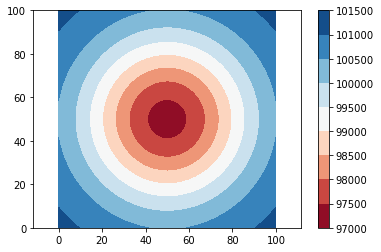

In [40]:
fig,ax = plt.subplots()
c = ax.contourf(X,Y,Z, cmap='RdBu')
fig.colorbar(c)
ax.axis('equal')

In [13]:
# Viser at jeg greier å plukke ut langs Y = 50
print(Y[:,50])
# Hvis jeg bare for 50 her, så er det bra

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]


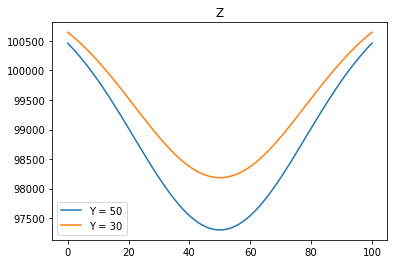

In [14]:
fig,ax = plt.subplots()
ax.plot(Z[:,50], label = 'Y = 50')
ax.plot(Z[:,30], label = 'Y = 30')
ax.set_title('Z')
ax.legend()

In [15]:
# Regner ut gradienten
dx=1250e3/100
dZdx,dZdy = np.gradient(Z,dx)

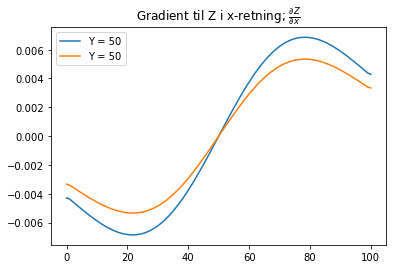

In [22]:
fig,ax = plt.subplots()
ax.plot(dZdx[:,50], label = 'Y = 50')
ax.plot(dZdx[:,30], label = 'Y = 50')

ax.set_title(r'Gradient til Z i x-retning; $\frac{\partial Z}{\partial x}$')
ax.legend()

## Verdig og retning av geostrofiske vinder: 

Komponentene for geostrofisk vind er gitt ved <br> 

$u = -\frac{1}{\rho f} \frac{\partial p}{\partial y}$ <br> 

og <br>

$v = \frac{1}{\rho f} \frac{\partial p}{\partial x}$ <br> 

hvor $f = 2\Omega sin(\phi) $, og $\phi$ breddegrad. For enkelthets skyld lar vi $\rho=1$ (ok i atmosfæren). 


In [26]:
def ug(dpdy,phi):
    '''
    Regner ut geostrofisk vind
    
    Paramters: 
        dpdx (np.array or float) : Deriverte av trykk i y-retning, 
        phi (float) : Breddegrad
        
    Returns: 
        ug : geostrofisk vind i x-retning
    '''
    
    ug = -1/(2*7.29*10**(-5)*np.sin(np.deg2rad(phi)))*dpdy
    return ug

def vg(dpdx,phi):
    '''
    Regner ut geostrofisk vind
    
    Paramters: 
        dpdy (np.array or float) : Deriverte av trykk i x-retning, 
        phi (float) : Breddegrad
        
    Returns: 
        vg : geostrofisk vind i y-retning
    '''
    vg = 1/(2*7.29*10**(-5)*np.sin(np.deg2rad(phi)))*dpdx
    return vg 

In [27]:
uu = ug(dZdx[:,50],45)

In [31]:
#langs Y = 50 
u_50 = ug(dZdy[:,50], -45)
v_50 = vg(dZdx[:,50], -45)

#langs Y = 30
u_30 = ug(dZdy[:,30], -45)
v_30 = vg(dZdx[:,30], -45)

#langs X = 40
u_40x = ug(dZdy[40,:], -45)
v_40x = vg(dZdx[40,:], -45)



(0.0, 100.0)

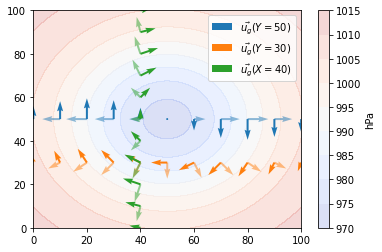

In [36]:
#hvor mange steg vil du hoppe før du plotter en vektor
step=10
cmap=plt.cm.coolwarm #fargeskala
#plotter disse på en figur så vi ser retningen bedre
fig,ax = plt.subplots()


ax.quiver(X[::step, 50],Y[::step ,50 ],u_50[::step],v_50[::step],color='C0',label=r'$\vec{u_g}(Y=50)$')
ax.quiver(X[::step, 50],Y[::step, 50],dZdx[::step,50],dZdy[::step,50],color='C0',alpha=0.5)

ax.quiver(X[::step, 30],Y[::step ,30 ],u_30[::step],v_30[::step],color='C1',label=r'$\vec{u_g}(Y=30)$')
ax.quiver(X[::step, 30],Y[::step ,30 ],dZdx[::step,30],dZdy[::step,30],color='C1',alpha=0.5)

q = ax.quiver(X[40, ::step],Y[40, ::step], u_40x[::step],v_40x[::step],color='C2',label=r'$\vec{u_g}(X=40)$')
ax.quiver(X[40, ::step],Y[40, ::step], dZdx[40,::step],dZdy[40,::step],color='C2',alpha=0.5)
ax.legend()
cb = ax.contourf(X,Y,Z/1e2,zorder=0,alpha=0.2,cmap=cmap)
cbar = fig.colorbar(cb)
cbar.set_label('hPa')
ax.set_ylim([0,100])

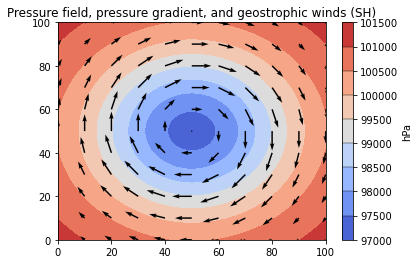

In [49]:
#regner ut u og v i hele feltet (for gøy)
u = ug(dZdy, -45)
v = vg(dZdx, -45)

fig,ax = plt.subplots()
c = ax.contourf(X,Y,Z, cmap = 'coolwarm')
ax.quiver(X[::step, ::step],Y[::step, ::step],u[::step, ::step],v[::step, ::step])
ax.set_title('Pressure field, pressure gradient, and geostrophic winds (SH)')
cb = fig.colorbar(c,drawedges=True)
cb.set_label('hPa')


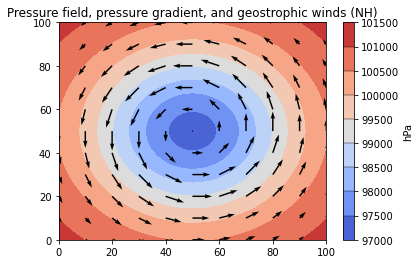

In [50]:
u = ug(dZdy, 45)
v = vg(dZdx, 45)

fig,ax = plt.subplots()
c = ax.contourf(X,Y,Z, cmap = 'coolwarm')
ax.quiver(X[::step, ::step],Y[::step, ::step],u[::step, ::step],v[::step, ::step])
ax.set_title('Pressure field, pressure gradient, and geostrophic winds (NH)')
cb = fig.colorbar(c,drawedges=True)
cb.set_label('hPa')
